<a href="https://colab.research.google.com/github/nikhilans/appliance-energy-prediction/blob/main/CH_Nikhila_N_S_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**

## Problem Statement

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

## Data Description

date time year-month-day hour:minute:second

* **date** - time year-month-day hour:minute:second
* **Appliances** - energy use in Wh (Dependent variable)
* **lights** - energy use of light fixtures in the house in Wh (Drop this column)
* **T1** - Temperature in **kitchen** area, in Celsius
* **RH1** - Humidity in **kitchen** area, in % 
* **T2** - Temperature in **living room** area, in Celsius 
* **RH2** - Humidity in **living room** area, in %
* **T3** - Temperature in **laundry** room area
* **RH3** - Humidity in **laundry** room area, in % 
* **T4** - Temperature in **office room**, in Celsius 
* **RH4** - Humidity in **office room**, in %
* **T5** - Temperature in **bathroom**, in Celsius
* **RH5** - Humidity in **bathroom**, in % 
* **T6** - Temperature **outside the building** (north side), in Celsius
* **RH6** - Humidity **outside the building** (north side), in %
* **T7** - Temperature in **ironing room**, in Celsius
* **RH7** - Humidity in **ironing room**, in % 
* **T8** - Temperature in **teenager room** 2, in Celsius 
* **RH8** - Humidity in **teenager room** 2, in %
* **T9** - Temperature in **parents room**, in Celsius
* **RH9** - Humidity in **parents room**, in % 
* **T_out** - Temperature outside (from Chievres weather station), in Celsius 
* **Pressure** - (from Chievres weather station), in mm Hg RHout 
* **Humidity** - outside (from Chievres weather station), in %
* **Wind speed** - (from Chievres weather station), in m/s
* **Visibility** - (from Chievres weather station), in km
* **Tdewpoint** - (from Chievres weather station), Â°C
* rv1 - Random variable 1, nondimensional
* rv2 - Random variable 2, nondimensional
<br>
<br>
Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.


In [ ]:
# Importing basic libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Appliances Energy Prediction - Nikhila N S/data_application_energy.csv')

In [ ]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Check for null values

df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

We have no null values and duplicate records.

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Divide the columns based on type

col_hum = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
col_temp = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

col_weather = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

col_randoms = ["rv1", "rv2"]

In [ ]:
# Quick look at humidity values

df[col_hum].describe()

RH_1          RH_2  ...          RH_8          RH_9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      40.259739     40.420420  ...     42.936165     41.552401
std        3.979299      4.069813  ...      5.224361      4.151497
min       27.023333     20.463333  ...     29.600000     29.166667
25%       37.333333     37.900000  ...     39.066667     38.500000
50%       39.656667     40.500000  ...     42.375000     40.900000
75%       43.066667     43.260000  ...     46.536000     44.338095
max       63.360000     56.026667  ...     58.780000     53.326667

[8 rows x 9 columns]

* We see that the humidity inside the house is similar in various rooms of the house.
* RH_6 - humidity in the bathroom - since the bathroom is not always in use, it is reasonable to see a high variance. When the bathroom is in use, we would see high humidity and vice versa. 
* RH_5 - humidty outside the house - this is measured by the sensor. Humidity outside the house will have different values than inside the house. 

In [ ]:
# Quick look at temperature values

df[col_temp].describe()

T1            T2  ...            T8            T9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     22.029107     19.485828
std        1.606066      2.192974  ...      1.956162      2.014712
min       16.790000     16.100000  ...     16.306667     14.890000
25%       20.760000     18.790000  ...     20.790000     18.000000
50%       21.600000     20.000000  ...     22.100000     19.390000
75%       22.600000     21.500000  ...     23.390000     20.600000
max       26.260000     29.856667  ...     27.230000     24.500000

[8 rows x 9 columns]

* Distribution of temperature values is similar across different rooms. 
* T5 - temperature outside is also similar to the inside temperature.
* T6 - temperature inside bathroom has high variance as temperature will vary a lot depending on usage or non usage

In [ ]:
# Quick look at weather data collected from the weather station

df[col_weather].describe()

T_out   Press_mm_hg  ...    Visibility     Tdewpoint
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean       7.411665    755.522602  ...     38.330834      3.760707
std        5.317409      7.399441  ...     11.794719      4.194648
min       -5.000000    729.300000  ...      1.000000     -6.600000
25%        3.666667    750.933333  ...     29.000000      0.900000
50%        6.916667    756.100000  ...     40.000000      3.433333
75%       10.408333    760.933333  ...     40.000000      6.566667
max       26.100000    772.300000  ...     66.000000     15.500000

[8 rows x 6 columns]

In [ ]:
# Quick look at the dependant variable

df[['Appliances']].describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [ ]:
# Quick look at the lights column

df[['lights']].describe()

lights
count  19735.000000
mean       3.801875
std        7.935988
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000

## Exploratory Data Analysis

### Dependent Variable - Appliances



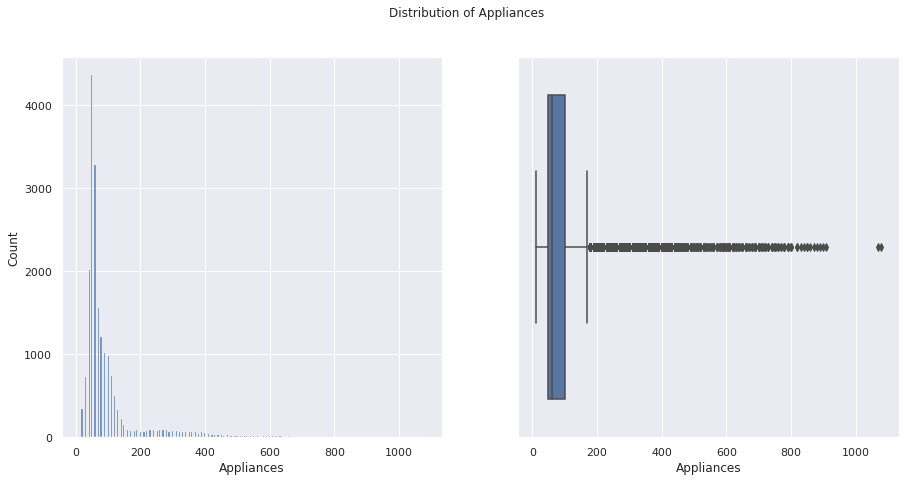

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.histplot(data=df, x='Appliances', ax=axes[0])
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

Distribution is highly right skewed. Also, we can see there are outliers.

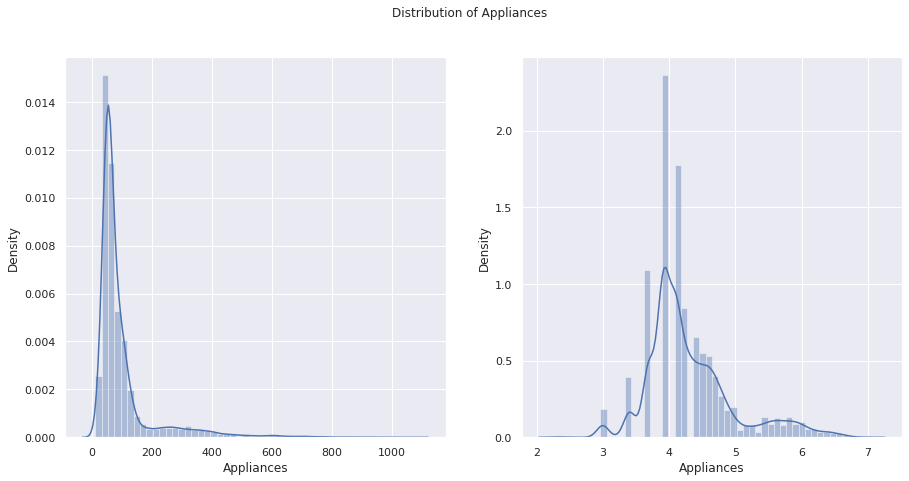

In [ ]:
# Using log transformation to treat the skewness

f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0])
sns.distplot(np.log(df['Appliances']), hist=True, ax=axes[1])

plt.show()

### Lights

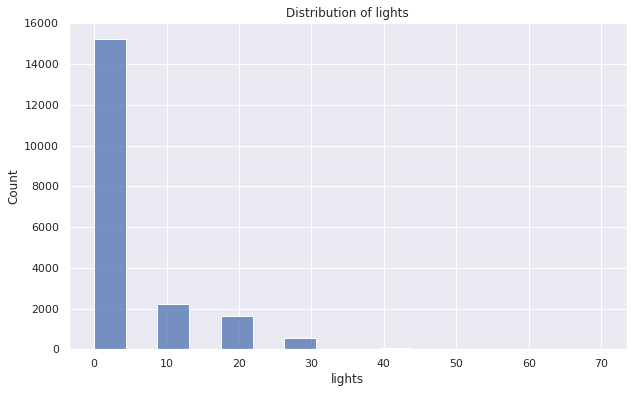

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='lights')
plt.title(f'Distribution of lights')
plt.show()

In [ ]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where lights are not turned on; or it could be during the night when lights are turned off.

### Humidity

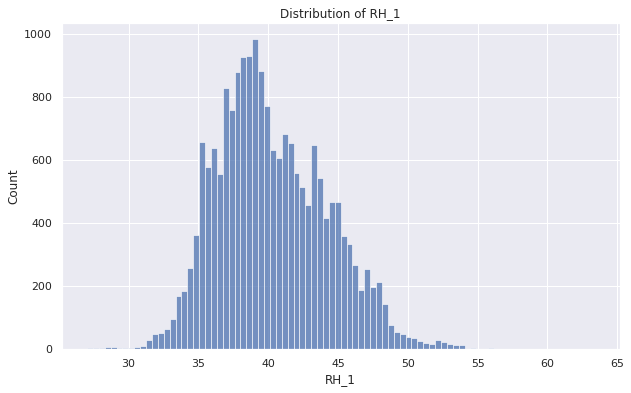

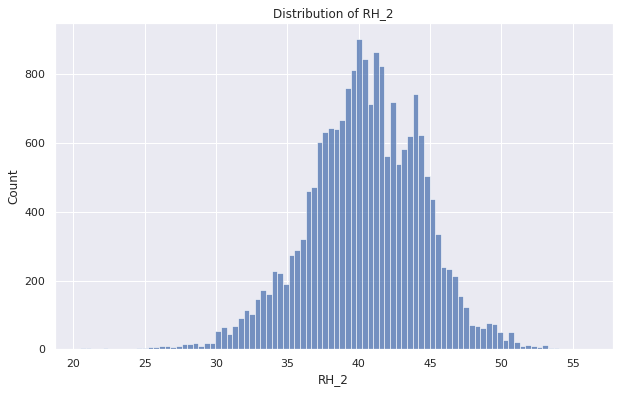

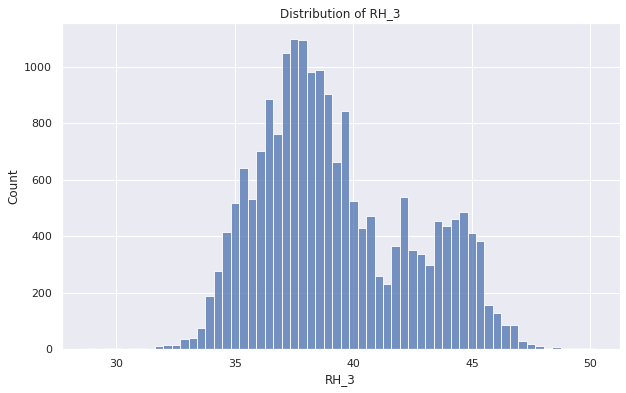

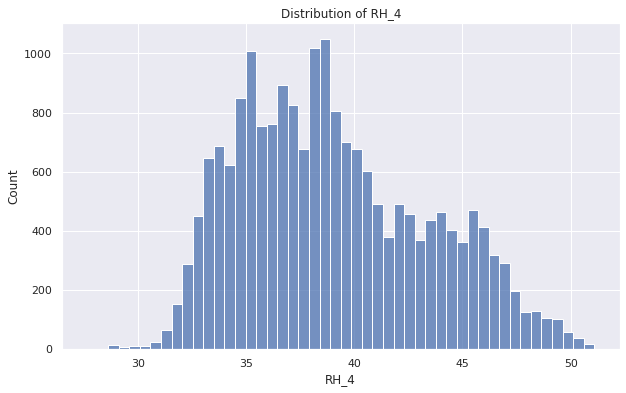

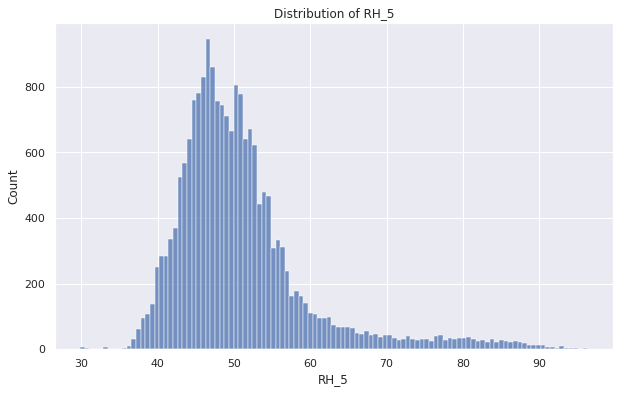

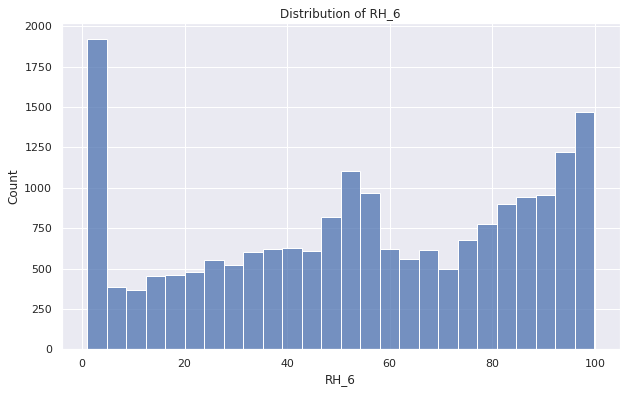

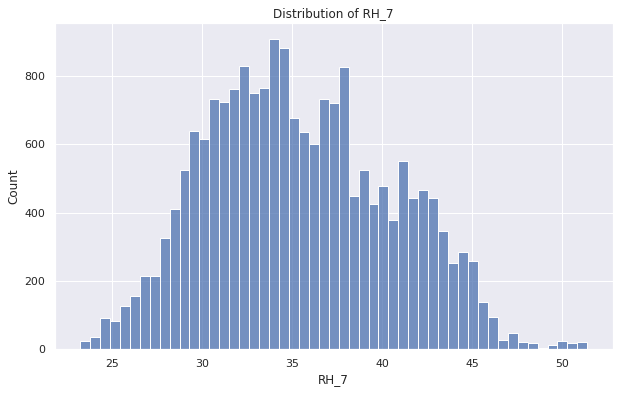

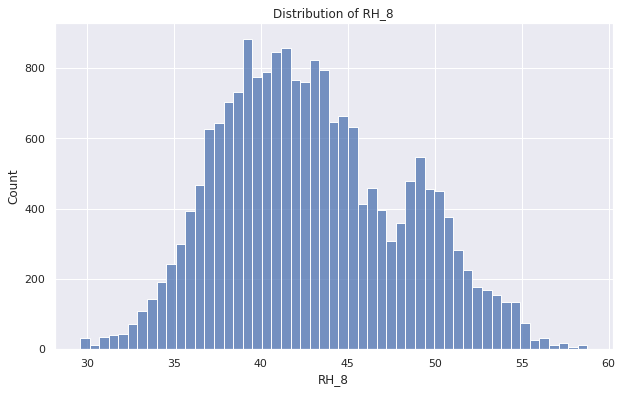

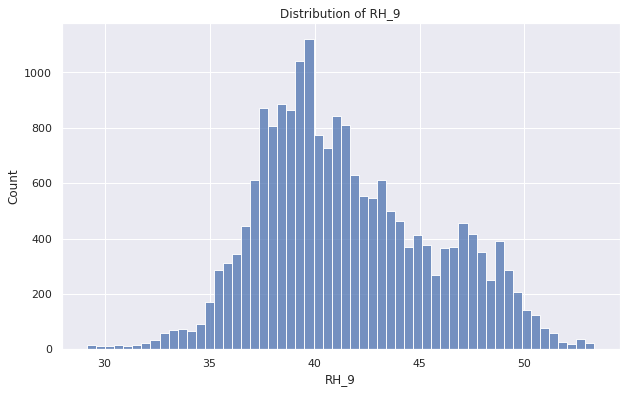

In [ ]:
for i, ii in enumerate(df[col_hum]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

* All humidity varaibles follow normal distribution except for RH_6 - which is the humidity outside. 

### Temperature

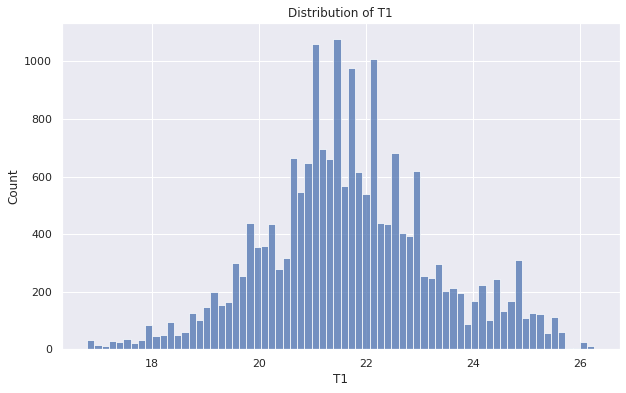

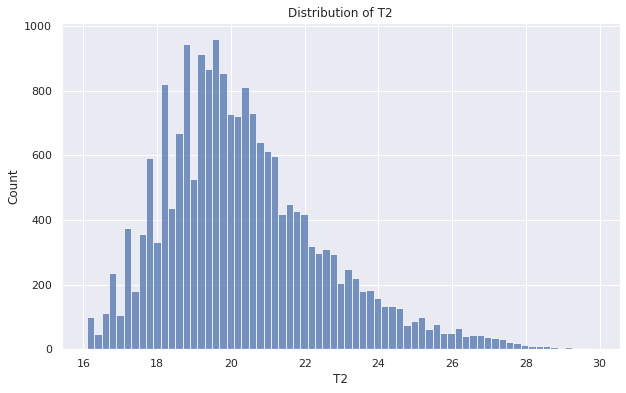

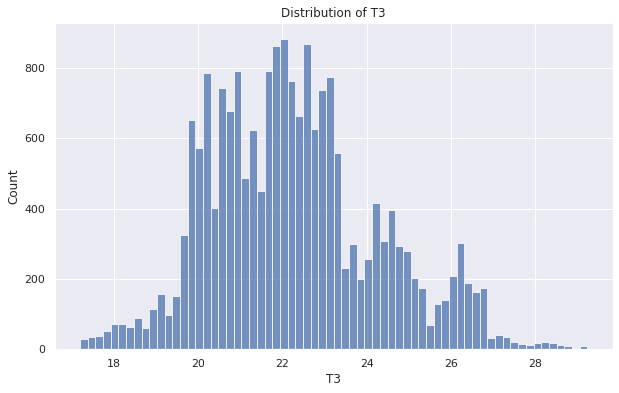

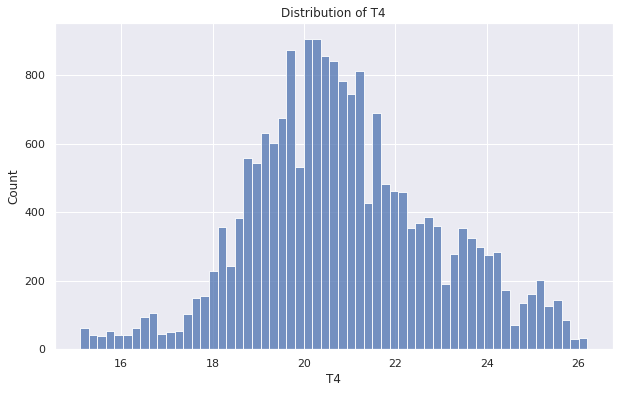

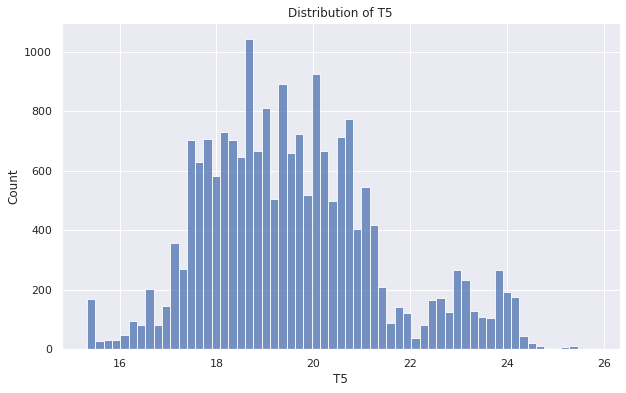

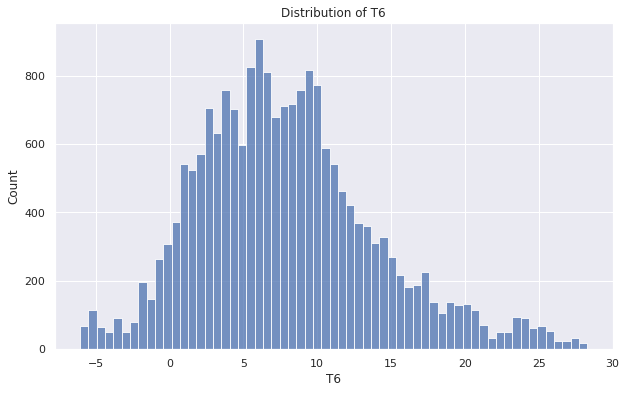

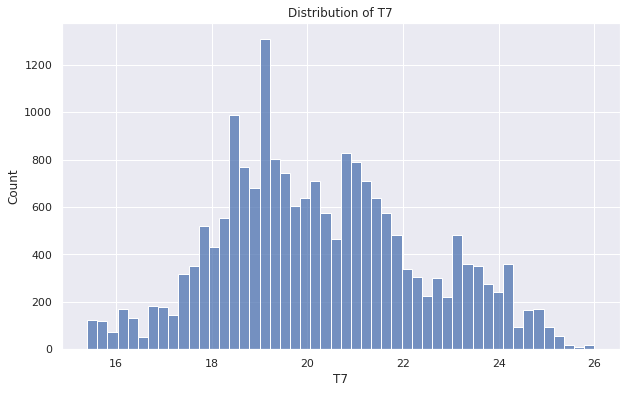

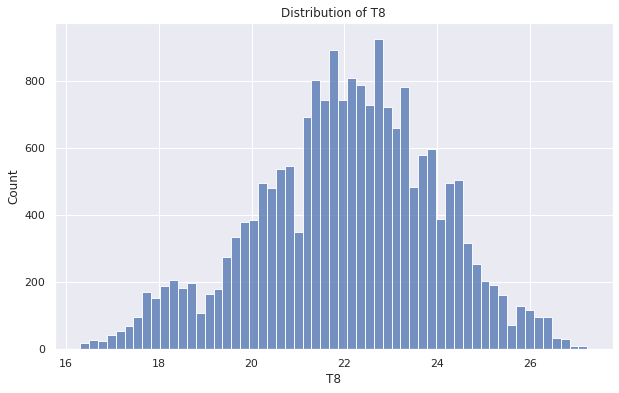

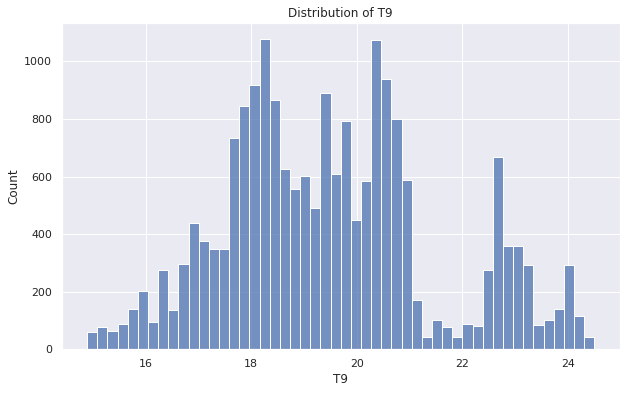

In [ ]:
for i, ii in enumerate(df[col_temp]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

### Outside weather

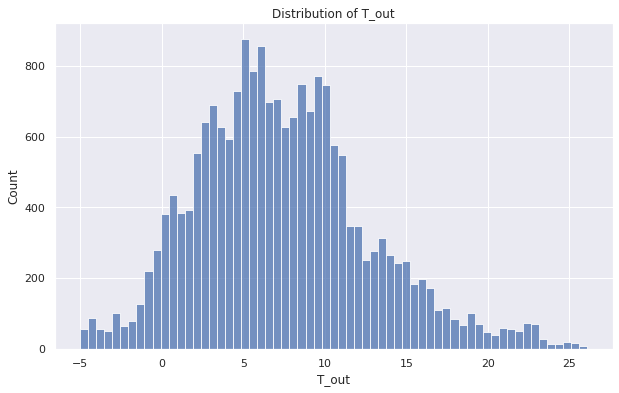

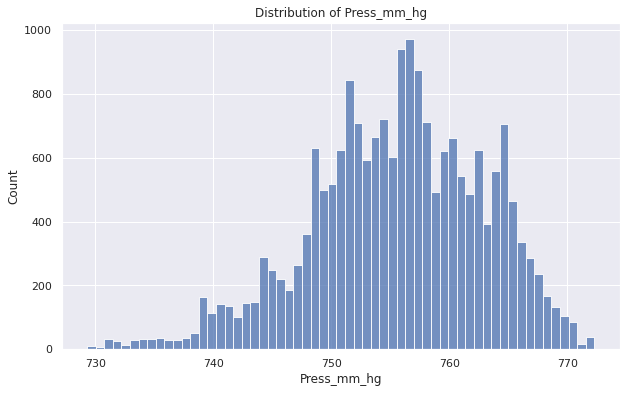

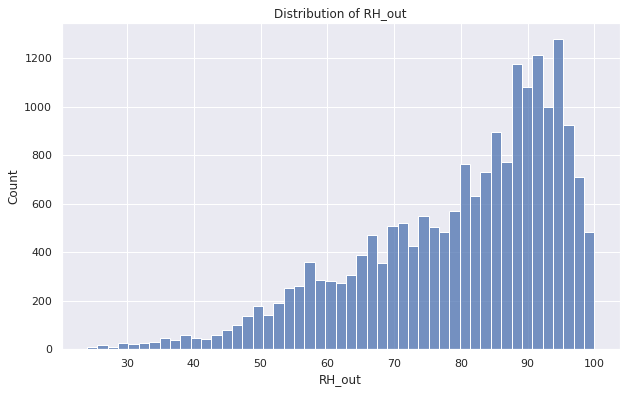

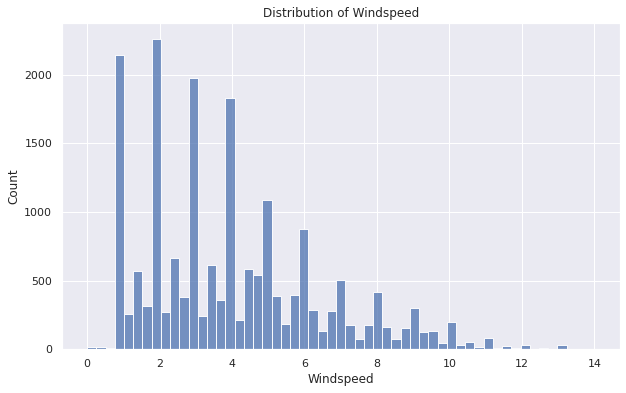

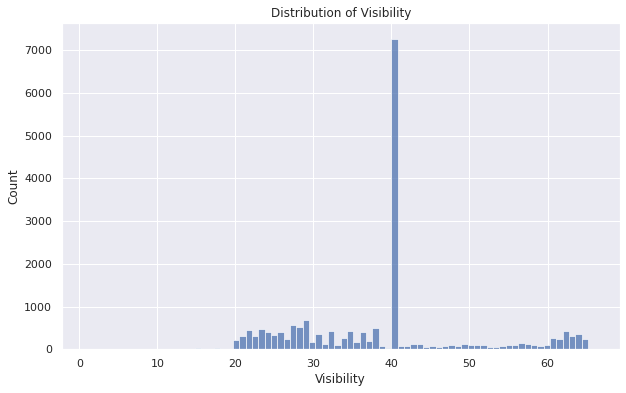

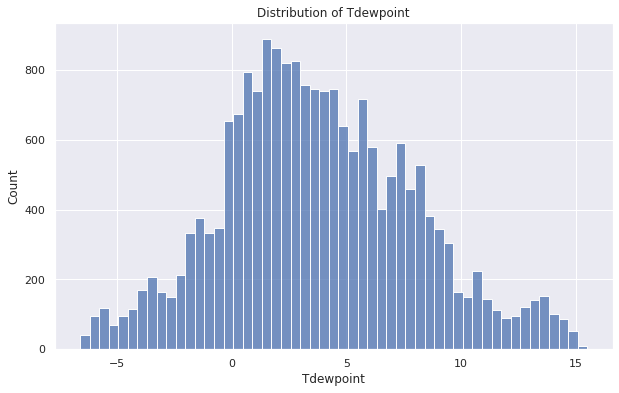

In [ ]:
for i, ii in enumerate(df[col_weather]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

### Features vs Target Variable

In [ ]:
df.columns[2:]

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

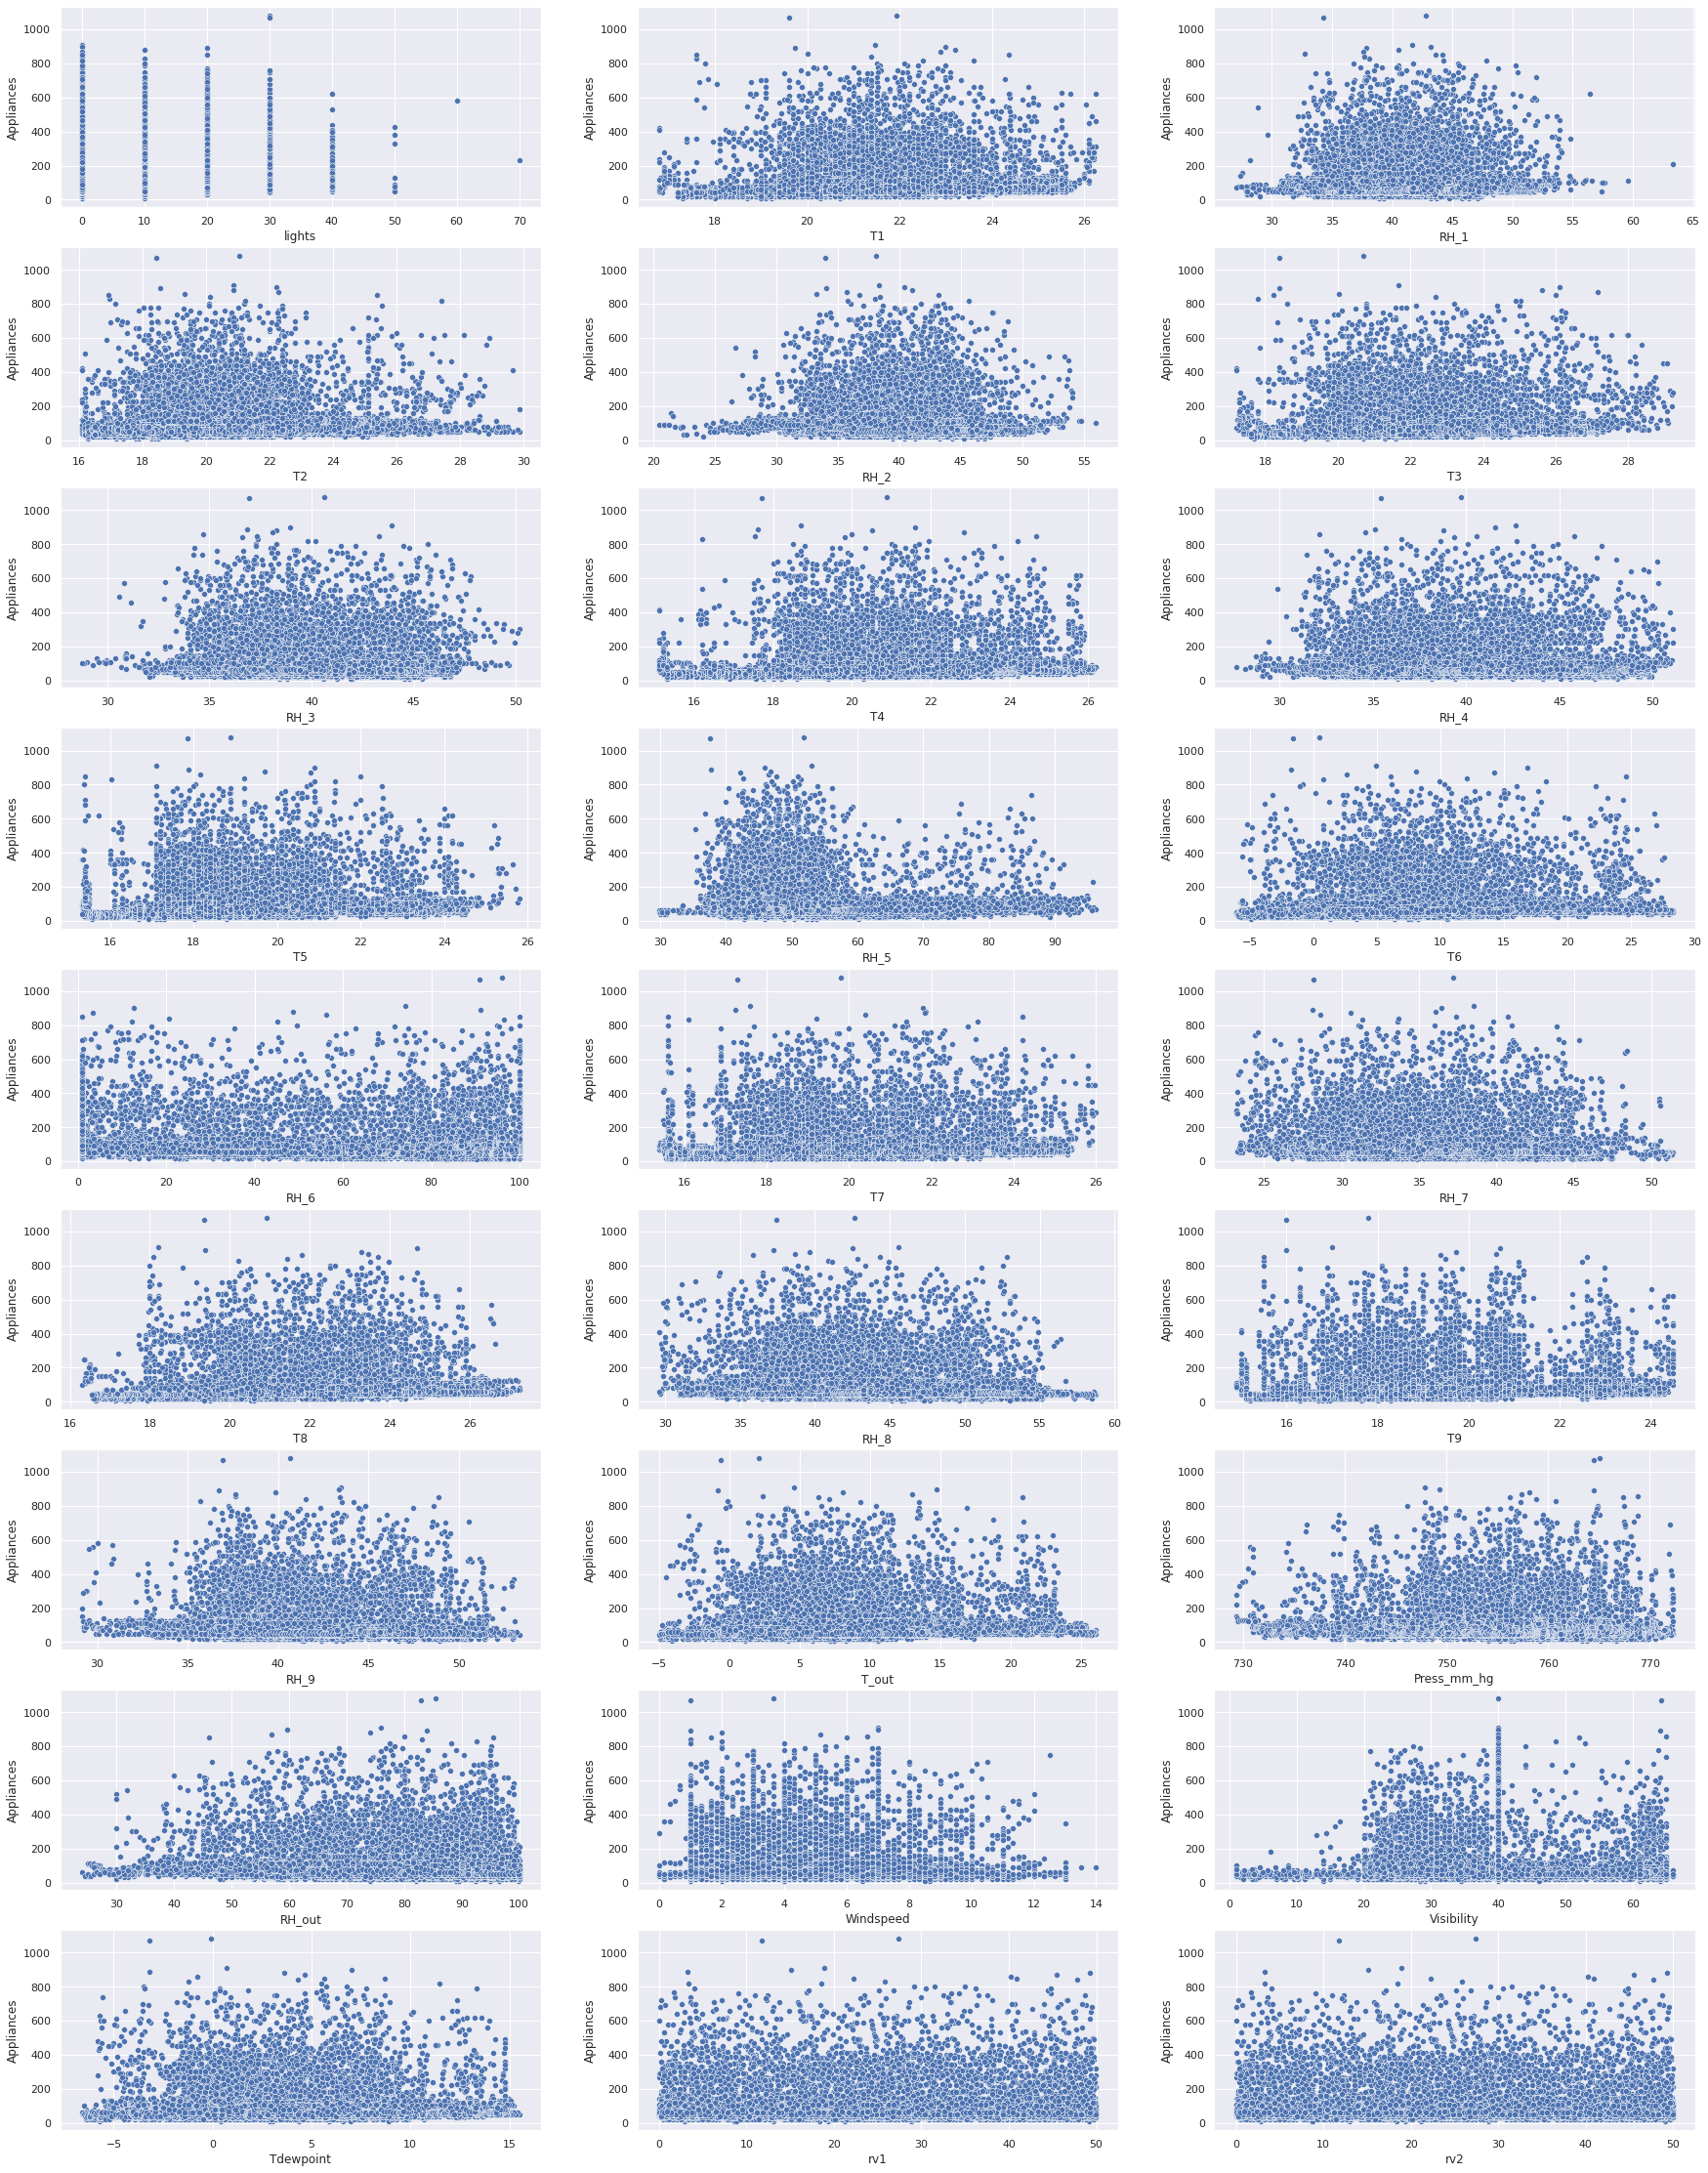

In [ ]:
feature_vars = list(df.columns[2:])

ls = []
colName = [j for j in df[feature_vars]]
a = 0
while a < 10:
    for i in range(3):
        ls.append((a, i))
    a+=1

fig, ax = plt.subplots(9, 3, figsize=(30, 40))
for k in range(27):
    sns.scatterplot(data=df, x=feature_vars[k], y=df['Appliances'], ax=ax[ls[k][0], ls[k][1]])

We do not see any pattern in the data

### Correlation Plot

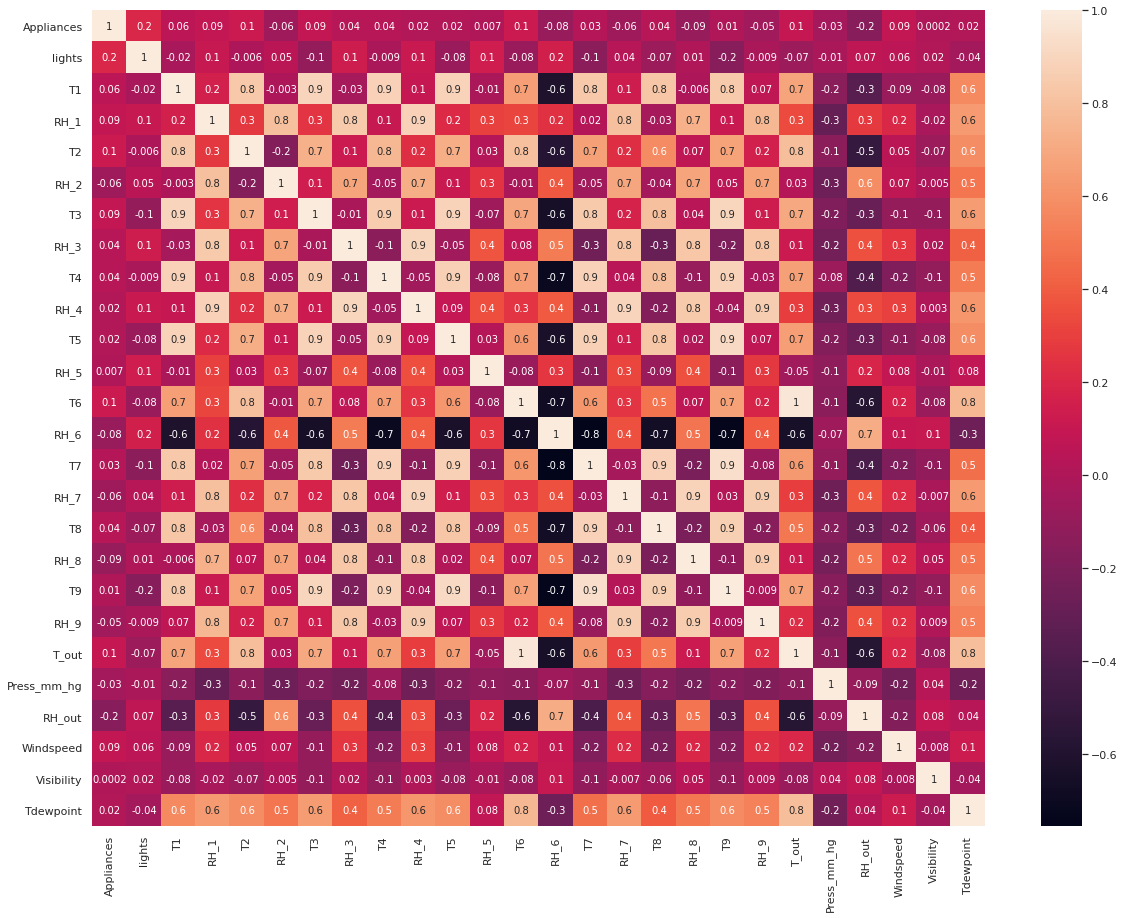

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df.iloc[:, :-2].corr(), annot = True, fmt='.1g')
plt.show()

* None of the variables are highly correlated with the target variable. 
* Correlations between indoor temperature and humidity is high as expected. 
* T_out and T6 have a correlation of 1 - both are the outside temperatures. Hence we need not consider both the variables. 
* Similary RH_out and RH_6 are outside humidity. Hence they have a high positive correlation of 0.7.
* RH_6 has a negative correlation with the indoor temperatures and also outdoor temperature. This is expected as temperature and relative humidity are expected to be inversely proportional


### Extracting date time features from the date column

In [ ]:
from datetime import datetime

In [ ]:
df['date_1'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['exact_date'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
df['day_name'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%A'))
df['day_num'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%w'))
df['hour']=(df['date'].str.split(' ').str[1].str.split(':').str[0]).astype(int)
df['minute']=(df['date'].str.split(' ').str[1].str.split(':').str[1]).astype(int)
df['sec']=(df['date'].str.split(' ').str[1].str.split(':').str[2]).astype(int)

df['no_seconds'] = (df['hour']*3600) + (df['minute']*60) + df['sec']
df['week_status'] = np.where((df['day_name']=='Saturday') | (df['day_name']=='Sunday'), 'Weekend', 'Weekday' )

In [ ]:
df.head()

date  Appliances  lights  ...  sec  no_seconds  week_status
0  2016-01-11 17:00:00          60      30  ...    0       61200      Weekday
1  2016-01-11 17:10:00          60      30  ...    0       61800      Weekday
2  2016-01-11 17:20:00          50      30  ...    0       62400      Weekday
3  2016-01-11 17:30:00          50      40  ...    0       63000      Weekday
4  2016-01-11 17:40:00          60      40  ...    0       63600      Weekday

[5 rows x 38 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  object        
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

### Plotting features over time

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()

* We can see that there peaks of high appliance usage and low appliance usage. This could probably indicate night time and day time.

* There are two large gaps in appliance usage. 
> * between 21 Jan 2016 and 30 Jan 2016
> * between 1 April 2016 and 3 April 2016



In [ ]:
# considering only 2 weeks data for the next few visulaizations for seeing better patterns. 

df_sub = df[(df['date_1']>=datetime(2016,1,11,0,0,0)) & (df['date_1']<datetime(2016,2,11,0,0,0))]
df_sub.shape

(4362, 38)

In [ ]:
# Defining a function to plot different features over time

def plot_vars(x, name, df_sub):

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{"secondary_y": True}]])

  # Add traces

  fig.add_trace(
      go.Scatter(x=df_sub['date'], y=df_sub['Appliances'], 
                name="Appliances",
                mode='lines'),
      secondary_y=False,
  )

  for i in x:
      fig.add_trace(
          go.Scatter(x=df_sub['date'], y=df_sub[i], 
                    name=i,
                    mode='lines'),
          secondary_y=True,
      )

  fig.update_layout(
      title=f'Appliance usage and {name} over two weeks',
      xaxis_title="Date")
      
  fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
  fig.update_yaxes(title_text=f"{name}", secondary_y=True)    
      
  fig.show()

In [ ]:
plot_vars(['lights'], 'Lights', df_sub)

Light usage mostly matches with appliance usage. They almost have the same peaks.

In [ ]:
plot_vars(col_temp+['T_out'], 'Temperature', df_sub)

Excluding T6 and T9, we can see that the temperature inside slightly goes up when the appliance usage is at its peak.

In [ ]:
plot_vars(col_hum+['RH_out'], 'Humidity', df_sub)

RH5 which is the humidity in bathroom peaks when bathroom is in use - due to hot water usage during bathing.

In [ ]:
plot_vars(['Windspeed', 'Visibility', 'Tdewpoint'], 'Outside Weather', df_sub)

There are no patterns we can see with respect to outside weather

### Mean appliance usage with respect to different time features

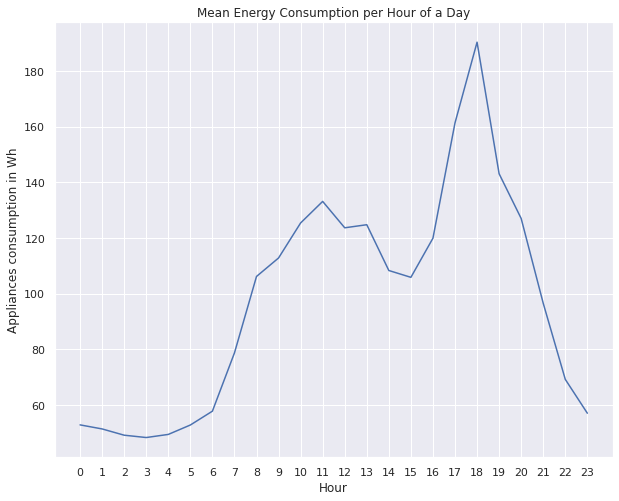

In [ ]:
# Mean Energy Consumption per Hour

df.groupby('hour')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)

plt.show()

* During night time appliance usage is low.
* High during morning hours
* And it peaks during the evening.

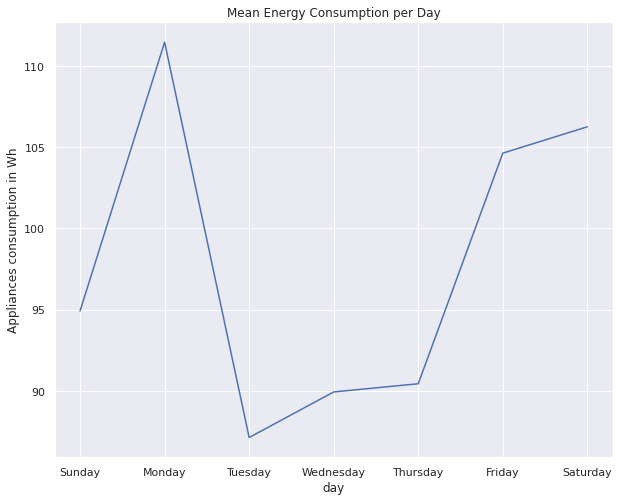

In [ ]:
# Mean Energy Consumption on different days of the week

df.groupby('day_num')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.show()

In [ ]:
days=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
arranged_day = pd.Categorical(df["day_name"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hour"],
               values="Appliances",columns=day_series,
               aggfunc=[np.mean],fill_value=0)

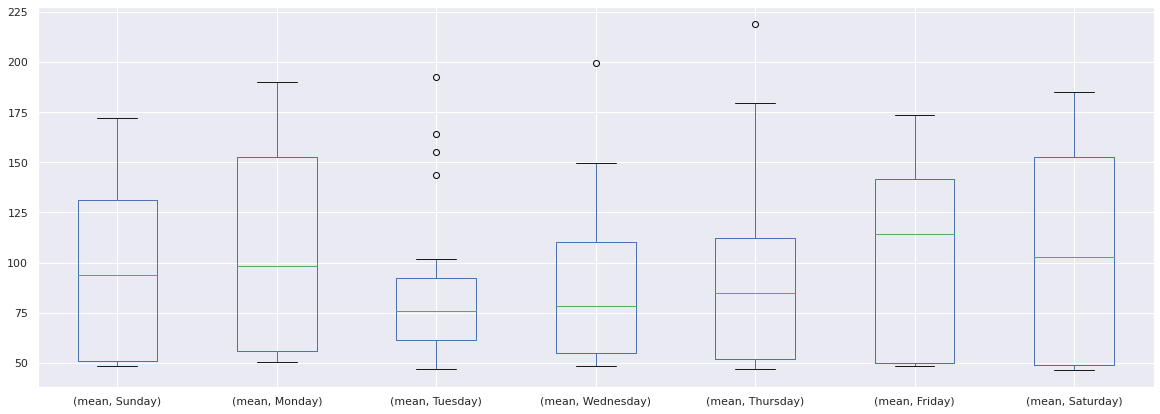

In [ ]:
table.plot.box(figsize=(20, 7))
plt.show()

* Usage is lowest on Tuesday, Wednesday and Thursday.
* Usage is high from Friday to Monday

### Outlier Analysis

#### Based on z-score

In [ ]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['Appliances']))

In [ ]:
threshold = 3

outliers = df[df['z_score'] > 3]

In [ ]:
outliers.shape

(540, 39)

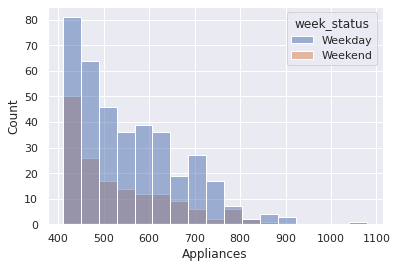

In [ ]:
sns.histplot(data=outliers, x='Appliances', hue='week_status')
plt.show()

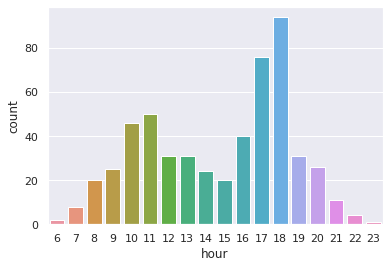

In [ ]:
sns.countplot(data=outliers, x='hour')
plt.show()

In [ ]:
outliers.exact_date.value_counts()

2016-03-25    17
2016-01-30    15
2016-04-04    15
2016-05-21    14
2016-03-14    14
              ..
2016-03-09     1
2016-05-08     1
2016-04-25     1
2016-05-15     1
2016-05-12     1
Name: exact_date, Length: 113, dtype: int64

In [ ]:
df_1 = df[df['z_score'] <= 3]

In [ ]:
df_1.head()

date  Appliances  lights  ...  no_seconds  week_status   z_score
0  2016-01-11 17:00:00          60      30  ...       61200      Weekday  0.367676
1  2016-01-11 17:10:00          60      30  ...       61800      Weekday  0.367676
2  2016-01-11 17:20:00          50      30  ...       62400      Weekday  0.465215
3  2016-01-11 17:30:00          50      40  ...       63000      Weekday  0.465215
4  2016-01-11 17:40:00          60      40  ...       63600      Weekday  0.367676

[5 rows x 39 columns]

In [ ]:
df_1.shape

(19195, 39)

In [ ]:
df.shape

(19735, 39)

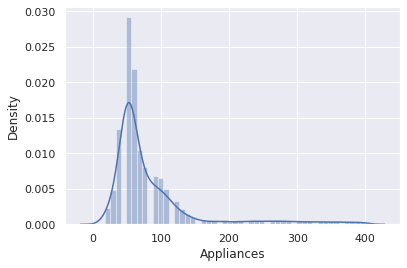

In [ ]:
sns.distplot(df_1['Appliances'], hist=True)
plt.show()

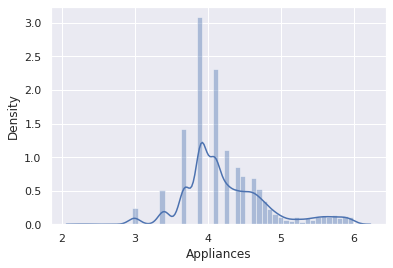

In [ ]:
sns.distplot(np.log(df_1['Appliances']), hist=True)
plt.show()

#### Based on IQR

In [ ]:
T=df[['Appliances']]
Q1 = T.quantile(0.25)
Q3 = T.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=T.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((T[column] < (Q1 - 1.5 * IQR)) |(T[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df_2 = df.drop(outlierSet, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


In [ ]:
df_2.shape

(17597, 39)

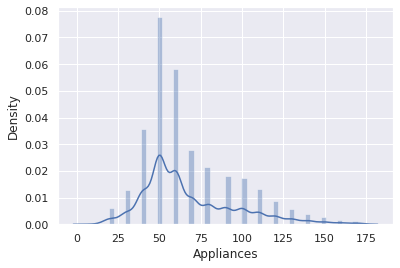

In [ ]:
sns.distplot(df_2['Appliances'], hist=True)
plt.show()

## Data Pre-processing

* We will first build a baseline model not discarding any outliers and considering all features. 
* However we will drop rv1 and rv2 as they are not relevant
* We will perform only feature scaling
* Apply log transformation on target variable to treat the skenewss
* We will consider hour column (which tells us the numbers of hourse since midnight), week_name and week_status - which we extracted from the date column.

In [ ]:
df.head(2)

date  Appliances  lights  ...  no_seconds  week_status   z_score
0  2016-01-11 17:00:00          60      30  ...       61200      Weekday  0.367676
1  2016-01-11 17:10:00          60      30  ...       61800      Weekday  0.367676

[2 rows x 39 columns]

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'date_1', 'exact_date',
       'day_name', 'day_num', 'hour', 'minute', 'sec', 'no_seconds',
       'week_status', 'z_score'],
      dtype='object')

In [ ]:
X = df.drop(['date', 'Appliances', 'rv1', 'rv2', 'date_1', 'exact_date', 'day_num', 'no_seconds', 'minute', 'sec', 'z_score'], axis=1)

In [ ]:
X = pd.get_dummies(X, columns=['day_name', 'week_status'], drop_first=True)

In [ ]:
X.head(2)

lights     T1  ...  day_name_Wednesday  week_status_Weekend
0      30  19.89  ...                   0                    0
1      30  19.89  ...                   0                    0

[2 rows x 33 columns]

In [ ]:
y = df['Appliances']

In [ ]:
# Tranforming target variable

y = np.log(y)

In [ ]:
y

0        4.094345
1        4.094345
2        3.912023
3        3.912023
4        4.094345
           ...   
19730    4.605170
19731    4.499810
19732    5.598422
19733    6.040255
19734    6.063785
Name: Appliances, Length: 19735, dtype: float64

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13814, 33) (13814,)
(5921, 33) (5921,)


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Models

In [ ]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import lightgbm
from lightgbm import LGBMRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
lr = LinearRegression()
lasso = Lasso(random_state=0)
ridge = Ridge(random_state=0)
knn = neighbors.KNeighborsRegressor()
svm = SVR(kernel='rbf')
rf = RandomForestRegressor(random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
lgbm = LGBMRegressor(random_state=0)

In [ ]:
models = [lr, lasso, ridge, knn, svm, rf, gbr, xgbr, lgbm]

In [ ]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0

       
    #read model one by one
    for model in models:
        model.random_state=0
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)      
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        
        df.loc[i,'Train R2'] = metrics.r2_score( np.exp(y_train), np.exp(train_pred) )
        df.loc[i,'Test R2'] = metrics.r2_score( np.exp(y_test), np.exp(test_pred) )
        
        df.loc[i,'Train RMSE'] = sqrt(mean_squared_error( np.exp(y_train), np.exp(train_pred) ) )
        df.loc[i,'Test RMSE'] = sqrt(mean_squared_error( np.exp(y_test), np.exp(test_pred) ) )
        
        df.loc[i,'Train MAE'] = mean_absolute_error( np.exp(y_train), np.exp(train_pred) )
        df.loc[i,'Test MAE'] = mean_absolute_error( np.exp(y_test), np.exp(test_pred) )
        
        i+=1

    return(df)

In [ ]:
scores_baseline = score_model(X_train,y_train,X_test,y_test)
scores_baseline

Model_Name  Train R2  ...  Train MAE   Test MAE
0           LinearRegression  0.113169  ...  44.226440  45.465276
1                      Lasso -0.052572  ...  51.183006  52.728827
2                      Ridge  0.113085  ...  44.224847  45.463457
3        KNeighborsRegressor  0.573432  ...  27.292431  34.118963
4                        SVR  0.284494  ...  34.039595  36.668320
5      RandomForestRegressor  0.879425  ...  12.753474  30.743566
6  GradientBoostingRegressor  0.243309  ...  38.428986  40.527476
7               XGBRegressor  0.242592  ...  38.433358  40.544755
8              LGBMRegressor  0.516729  ...  29.755694  34.872007

[9 rows x 7 columns]

* Linear Regression, Lasso and Ridge are the worst performing models. This is expected as we do not see any linear relationship between the features and the target variable.
* Tree based regressors and GBM's perform better.

In [ ]:
# define function for kfold cv

from sklearn.model_selection import KFold, cross_val_score

def kfoldcv(model_name, model):  
  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
  print(model_name)
  print('\n cross validation results')
  print(rmse)
  print('mean=', rmse.mean(), 'std_dev=', rmse.std())

In [ ]:
kfoldcv('Random Forest', rf)

Random Forest

 cross validation results
[0.41283312 0.38931634 0.38081689 0.37745415 0.38442926]
mean= 0.38896995381830846 std_dev= 0.012564034805728848


In [ ]:
kfoldcv('Gradient Boosting Regression', gbr)

Gradient Boosting Regression

 cross validation results
[0.51143637 0.47721408 0.48465462 0.4842814  0.48167905]
mean= 0.487853104770577 std_dev= 0.012086899328788338


In [ ]:
kfoldcv('XGBoost', xgbr)

XGBoost

 cross validation results
[0.5129845  0.47614486 0.48450743 0.48459499 0.48333893]
mean= 0.4883141417108279 std_dev= 0.012726300424672037


In [ ]:
# define function for plotting feature importance

def feature_importance(X, model, model_name):
  features = X.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.title(f'Feature Importance {model_name}')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

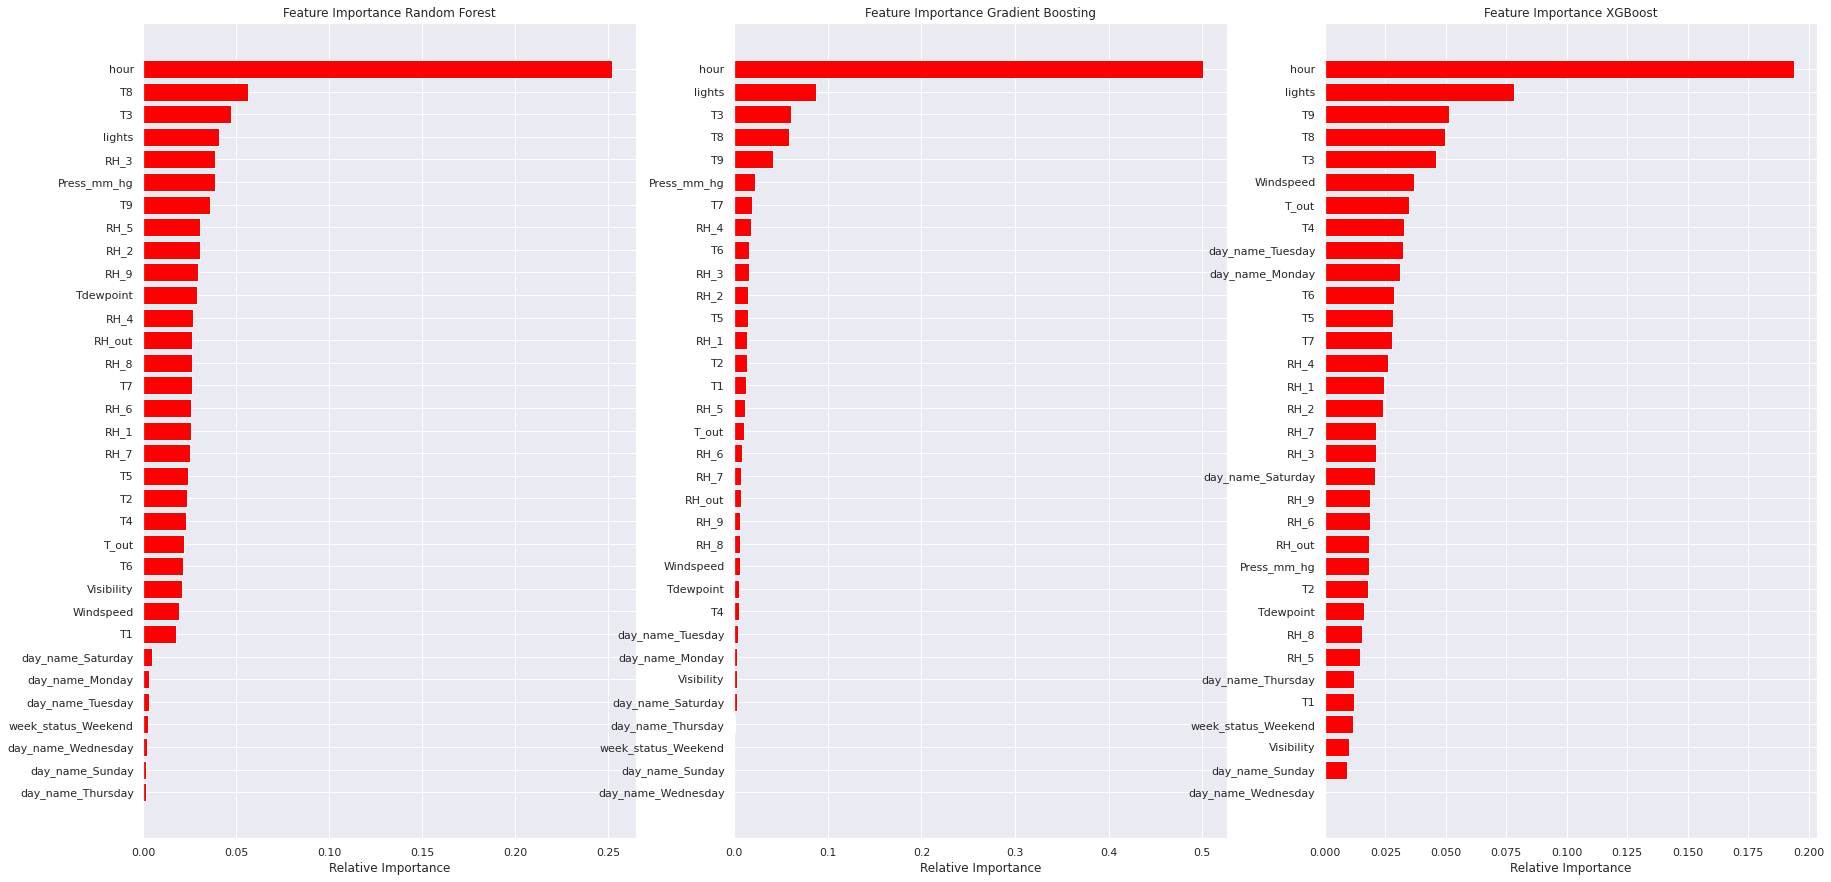

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(1,3,1)
feature_importance(X, rf, 'Random Forest')

plt.subplot(1,3,2)
feature_importance(X, gbr, 'Gradient Boosting')

plt.subplot(1,3,3)
feature_importance(X, xgbr, 'XGBoost')

* Days of the week and weekend status are not important.


## Dropping Outliers

We will consider the data set that was created after dropping outliers based on IQR

In [ ]:
X = df_2.drop(['date', 'Appliances', 'rv1', 'rv2', 'date_1', 'exact_date', 'day_num', 'no_seconds', 'minute', 'sec', 'z_score', 'day_name', 'week_status'], axis=1)

In [ ]:
X.head(2)

lights     T1       RH_1    T2  ...  Windspeed  Visibility  Tdewpoint  hour
0      30  19.89  47.596667  19.2  ...   7.000000   63.000000        5.3    17
1      30  19.89  46.693333  19.2  ...   6.666667   59.166667        5.2    17

[2 rows x 26 columns]

In [ ]:
y = df_2['Appliances']

In [ ]:
y = np.log(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12317, 26) (12317,)
(5280, 26) (5280,)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scores_baseline_1 = score_model(X_train,y_train,X_test,y_test)
scores_baseline_1

Model_Name  Train R2  ...  Train MAE   Test MAE
0           LinearRegression  0.342188  ...  16.451033  16.555287
1                      Lasso -0.036180  ...  21.218105  21.275463
2                      Ridge  0.342186  ...  16.451154  16.555198
3        KNeighborsRegressor  0.755885  ...   9.266467  12.064371
4                        SVR  0.649193  ...  11.500576  12.651603
5      RandomForestRegressor  0.947940  ...   4.025089  10.725629
6  GradientBoostingRegressor  0.558593  ...  13.214269  13.699315
7               XGBRegressor  0.557168  ...  13.248553  13.703492
8              LGBMRegressor  0.733013  ...  10.117556  11.925882

[9 rows x 7 columns]

We see a significant improvement in the scores after using data without any outliers

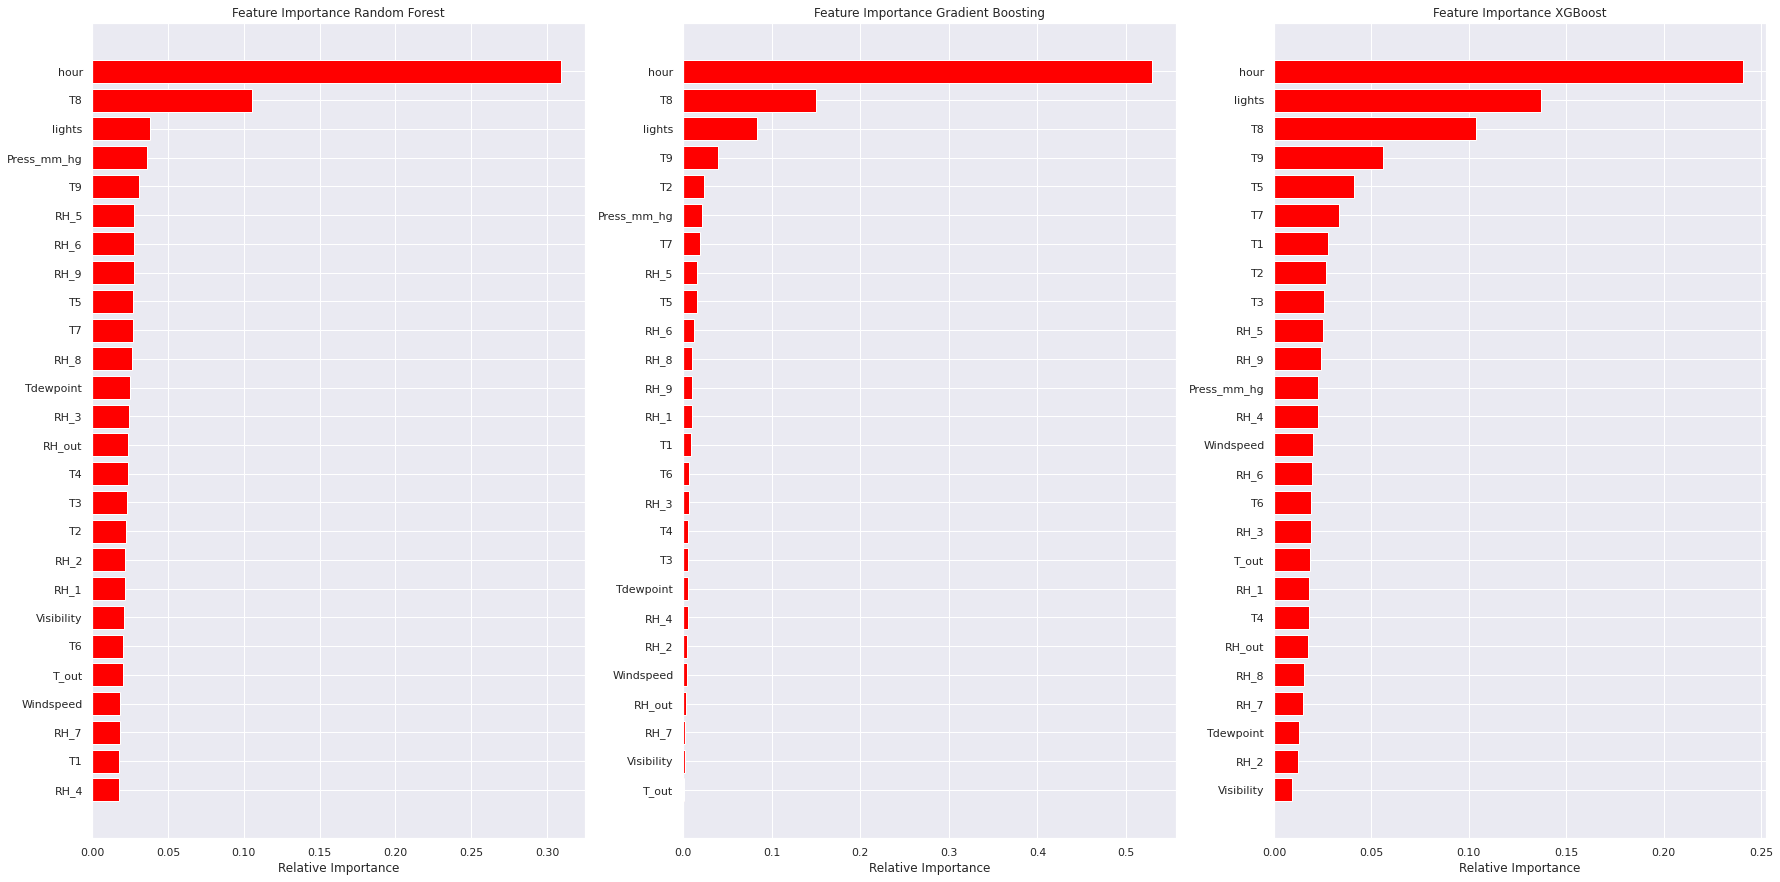

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(1,3,1)
feature_importance(X, rf, 'Random Forest')

plt.subplot(1,3,2)
feature_importance(X, gbr, 'Gradient Boosting')

plt.subplot(1,3,3)
feature_importance(X, xgbr, 'XGBoost')

## Using select features

* T6 and T_out have a high positive correlation of 1. So we can drop T_out.
* Also dropping Visibility and Windspeed based on low feature importance.
* We are going to keep all other features as we want to see which rooms in the house are significant.

In [ ]:
df_2.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'date_1', 'exact_date',
       'day_name', 'day_num', 'hour', 'minute', 'sec', 'no_seconds',
       'week_status', 'z_score'],
      dtype='object')

In [ ]:
X = df_2.drop(['date', 'Appliances', 'rv1', 'rv2', 'date_1', 'exact_date', 'day_name', 'day_num', 'no_seconds', 'minute', 'sec', 'week_status', 'z_score',
               'T_out', 'Visibility', 'Windspeed'
               ], axis=1)
y = df_2['Appliances']
y = np.log(y)

In [ ]:
X.head()

lights     T1       RH_1    T2  ...  Press_mm_hg  RH_out  Tdewpoint  hour
0      30  19.89  47.596667  19.2  ...        733.5    92.0        5.3    17
1      30  19.89  46.693333  19.2  ...        733.6    92.0        5.2    17
2      30  19.89  46.300000  19.2  ...        733.7    92.0        5.1    17
3      40  19.89  46.066667  19.2  ...        733.8    92.0        5.0    17
4      40  19.89  46.333333  19.2  ...        733.9    92.0        4.9    17

[5 rows x 23 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12317, 23) (12317,)
(5280, 23) (5280,)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scores_baseline_3 = score_model(X_train,y_train,X_test,y_test)
scores_baseline_3

Model_Name  Train R2  ...  Train MAE   Test MAE
0           LinearRegression  0.339802  ...  16.479488  16.567297
1                      Lasso -0.036180  ...  21.218105  21.275463
2                      Ridge  0.339804  ...  16.479711  16.567327
3        KNeighborsRegressor  0.755233  ...   9.269661  12.163874
4                        SVR  0.635300  ...  11.760932  12.811579
5      RandomForestRegressor  0.947820  ...   4.028373  10.723269
6  GradientBoostingRegressor  0.556353  ...  13.257324  13.731685
7               XGBRegressor  0.555735  ...  13.236360  13.694389
8              LGBMRegressor  0.731732  ...  10.144335  11.947300

[9 rows x 7 columns]

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
# Define function for training model, using it for predictions and printing metrics

def build_model(model, param_dict, xtrain, ytrain):

  grid = RandomizedSearchCV(estimator=model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')
  
  grid.fit(xtrain, ytrain)
  optimal_model = grid.best_estimator_

  print('\n\n\n')
  print('Best Parameters =', grid.best_params_)

  return optimal_model

In [ ]:
# Function for prediction and printing metrics

def predict(model_name, optimal_model, xtrain, xtest, ytrain, ytest):

  train_pred = optimal_model.predict(xtrain)
  test_pred = optimal_model.predict(xtest)

  print('\n')
  print('R2 Score for train =', metrics.r2_score( np.exp(ytrain), np.exp(train_pred) ) )
  print('R2 Score for test =', metrics.r2_score( np.exp(ytest), np.exp(test_pred) ) )

  print('\n')
  print('RMSE for train =', sqrt(mean_squared_error( np.exp(ytrain), np.exp(train_pred) ) ) )
  print('RMSE for test =', sqrt(mean_squared_error( np.exp(ytest), np.exp(test_pred) ) ) )

  print('\n')
  print('MAE =', mean_absolute_error( np.exp(ytrain), np.exp(train_pred) ) )
  print('MAE =', mean_absolute_error( np.exp(ytest), np.exp(test_pred) ) )

### Random Forest

In [ ]:
param_dict_rf = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100], 
    'random_state': [0],
    'n_jobs' : [5]
     }

In [ ]:
rf_optimal_model = build_model(rf, param_dict_rf, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4, total=   2.5s
[CV] random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4, total=   0.8s
[CV] random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4 
[CV]  random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4, total=   0.8s
[CV] random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4 
[CV]  random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4, total=   0.8s
[CV] random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4 
[CV]  random_state=0, n_jobs=5, n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_features=sqrt, max_depth=4, total=   0.8s
[CV] random_state=0, n_jobs=5, n_estimators=80, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished






Best Parameters = {'random_state': 0, 'n_jobs': 5, 'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 40, 'max_features': 'auto', 'max_depth': 8}


In [ ]:
rf_optimal_model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=150, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=5, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)>

In [ ]:
predict('Random Forest', rf_optimal_model, X_train, X_test, y_train, y_test)



R2 Score for train = 0.5454079140341255
R2 Score for test = 0.4997062422482442


RMSE for train = 19.161839768236035
RMSE for test = 20.2419903645769


MAE = 13.401941757215626
MAE = 13.898174364741331


After tuning, Random Forest does not overfit.

### GBM

In [ ]:
param_dict_gbm = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'random_state': [0]
    }

In [ ]:
gbm_optimal_model = build_model(gbr, param_dict_gbm, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05, total=  12.0s
[CV] random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV]  random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05, total=  12.0s
[CV] random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05 
[CV]  random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05, total=  12.0s
[CV] random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05 
[CV]  random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05, total=  12.0s
[CV] random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05 
[CV]  random_state=0, n_estimators=180, max_depth=4, learning_rate=0.05, total=  12.0s
[CV] random_state=0, n_estimators=140, max_depth=3, learning_rate=0.1 
[CV]  random_state=0, n_estimators=140, max_depth=3, learning_rate=0.1, total=   7.0s
[CV] random_state=0, n_estimators=140, max_depth=3, learning_rate=0.1 
[CV]  random_state=0, n_estimators=140, max_depth=3, learning_rate=0.1, total=   7.1s
[CV] random_state=0, n_estimators=140, max_depth=3, learning_rate=0.1 
[CV]  random_state=0, n_estimators=140, max_depth=3

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.2min finished






Best Parameters = {'random_state': 0, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.05}


In [ ]:
gbm_optimal_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [ ]:
predict('Gradient Boosting Regression', gbm_optimal_model, X_train, X_test, y_train, y_test)



R2 Score for train = 0.8074370703171329
R2 Score for test = 0.6302304804220449


RMSE for train = 12.471325409237155
RMSE for test = 17.40228297013224


MAE = 8.721693773247608
MAE = 11.698596974412403


### XGBoost

In [ ]:
param_dict_xgb = {
    'objective':['reg:squarederror'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'random_state': [0]}

In [ ]:
xgb_optimal_model = build_model(xgbr, param_dict_xgb, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005, total=   1.7s
[CV] random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005, total=   1.8s
[CV] random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005 
[CV]  random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005, total=   1.7s
[CV] random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005 
[CV]  random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005, total=   1.7s
[CV] random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005 
[CV]  random_state=0, objective=reg:squarederror, n_estimators=100, max_depth=9, learning_rate=0.005, total=   1.7s
[CV] random_state=0, objective=reg:squarederror, n_estimators=60, max_depth=9, learning_rate=0.01 
[CV]  random_state=0, objective=reg:squarederror, n_estimators=60, max_depth=9, learning_rate=0.01, total=   1.1s
[CV] random_state=0,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished






Best Parameters = {'random_state': 0, 'objective': 'reg:squarederror', 'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.1}


In [ ]:
xgb_optimal_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=None, n_estimators=140,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)>

In [ ]:
predict('XGBoost', xgb_optimal_model, X_train, X_test, y_train, y_test)



R2 Score for train = 0.8870559931301611
R2 Score for test = 0.6532832541804872


RMSE for train = 9.551198354226258
RMSE for test = 16.85109320142294


MAE = 6.426416538012744
MAE = 11.223497299353282


### SVM

In [ ]:
param_dict_svm = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              }

In [ ]:
svm_optimal_model = build_model(svm, param_dict_svm, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] kernel=rbf, gamma=1, C=0.1 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   4.9s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   5.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   4.8s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   4.8s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   4.9s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=0.1, total=   4.6s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=0.1, total=   4.6s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=0.1, total=   4.6s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.1min finished






Best Parameters = {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [ ]:
svm_optimal_model.get_params

<bound method BaseEstimator.get_params of SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [ ]:
predict('SVM', svm_optimal_model, X_train, X_test, y_train, y_test)



R2 Score for train = 0.8002535992003436
R2 Score for test = 0.6256152701197554


RMSE for train = 12.701814038975165
RMSE for test = 17.51054789388209


MAE = 8.748107481909631
MAE = 11.73843434479699


In [ ]:
models = [svm_optimal_model, rf_optimal_model, gbm_optimal_model, xgb_optimal_model]

In [ ]:
scores_tuned = score_model(X_train,y_train,X_test,y_test)
scores_tuned

Model_Name  Train R2  ...  Train MAE   Test MAE
0                        SVR  0.800254  ...   8.748107  11.738434
1      RandomForestRegressor  0.545408  ...  13.401942  13.898174
2  GradientBoostingRegressor  0.807437  ...   8.721694  11.698597
3               XGBRegressor  0.887056  ...   6.426417  11.223497

[4 rows x 7 columns]

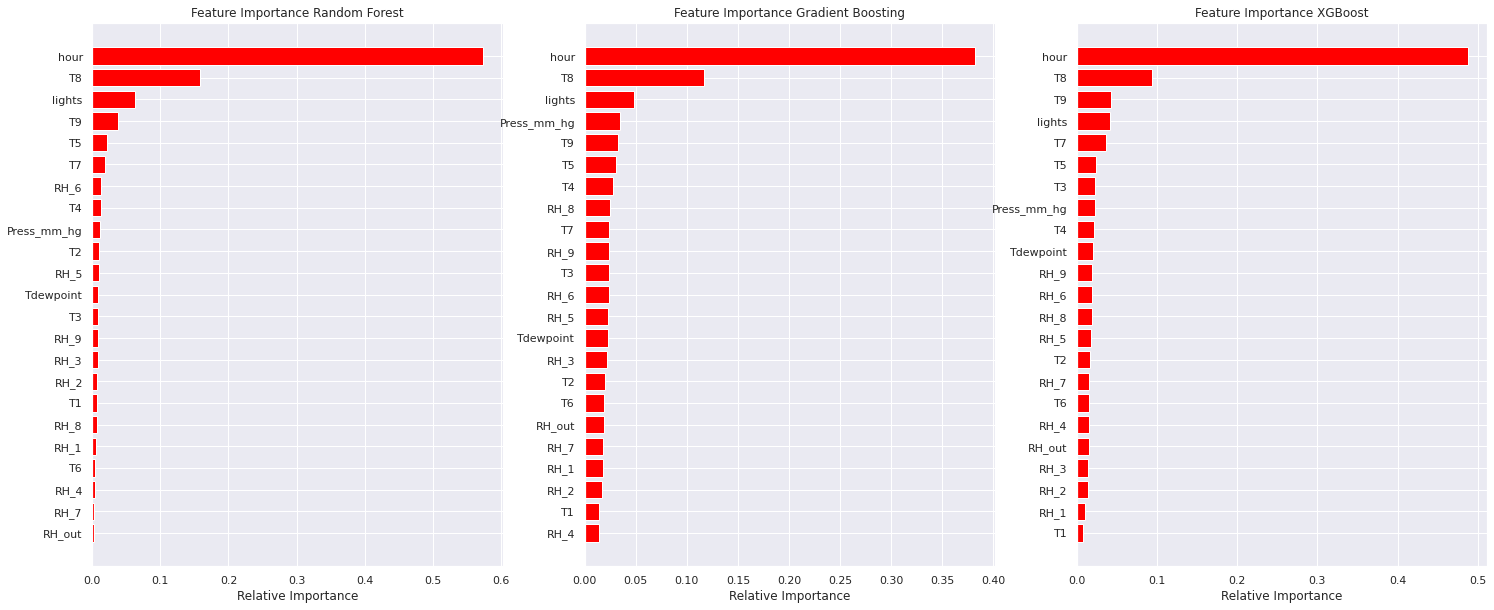

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
feature_importance(X, rf_optimal_model, 'Random Forest')

plt.subplot(1,3,2)
feature_importance(X, gbm_optimal_model, 'Gradient Boosting')

plt.subplot(1,3,3)
feature_importance(X, xgb_optimal_model, 'XGBoost')

## Weighted Average Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
def get_models():
  models = list()
  models.append(('SVM', svm))
  models.append(('Random Forest Regressor', rf))
  models.append(('Gradient Boosting Regressor', gbr))
  models.append(('XGBoost', xgbr))
  return models

In [ ]:
est = get_models()

In [ ]:
scores_baseline_3.iloc[4:8, :]

Model_Name  Train R2  ...  Train MAE   Test MAE
4                        SVR  0.635300  ...  11.760932  12.811579
5      RandomForestRegressor  0.947820  ...   4.028373  10.723269
6  GradientBoostingRegressor  0.556353  ...  13.257324  13.731685
7               XGBRegressor  0.555735  ...  13.236360  13.694389

[4 rows x 7 columns]

In [ ]:
test_rmse = np.array(scores_baseline_3.iloc[4:8, :]['Test RMSE'])
print(test_rmse)
ranking = 1 + np.argsort(np.argsort(test_rmse))
print(ranking)

[18.91053591 16.35156785 20.07831214 20.03151649]
[2 1 4 3]


In [ ]:
# create the ensemble
ensemble = VotingRegressor(estimators=est, weights=ranking)

In [ ]:
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_de...
                                          colsample_bynode=1,
                    

In [ ]:
predict('Weighted Average', ensemble, X_train, X_test, y_train, y_test)



R2 Score for train = 0.6414904776981383
R2 Score for test = 0.5609407499362683


RMSE for train = 17.0167499235638
RMSE for test = 18.962790078215352


MAE = 11.731074179236927
MAE = 12.80152714065968


In [ ]:
models = [ensemble]

In [ ]:
score = score_model(X_train, y_train, X_test, y_test)

In [ ]:
scores_tuned_1 = scores_tuned.append(score).reset_index()

In [ ]:
scores_tuned_1.drop('index', axis=1, inplace=True)
scores_tuned_1

Model_Name  Train R2  ...  Train MAE   Test MAE
0                        SVR  0.800254  ...   8.748107  11.738434
1      RandomForestRegressor  0.545408  ...  13.401942  13.898174
2  GradientBoostingRegressor  0.807437  ...   8.721694  11.698597
3               XGBRegressor  0.887056  ...   6.426417  11.223497
4            VotingRegressor  0.641490  ...  11.731074  12.801527

[5 rows x 7 columns]

Weighted Average Ensemble using Voting Regressor gives almost similar results. We get slight better R2 scores and RMSE when compared to Random Forest. However, tuned modesl of GBM and XGBoost are better.

## Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking = StackingRegressor(estimators=est[:3], final_estimator=xgbr, cv=5)
stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('SVM',
                               SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impu...
                                     

In [ ]:
models = [stacking]
score = score_model(X_train, y_train, X_test, y_test)


In [ ]:
scores_tuned_2 = scores_tuned_1.append(score).reset_index()
scores_tuned_2.drop('index', axis=1, inplace=True)
scores_tuned_2

Model_Name  Train R2  ...  Train MAE   Test MAE
0                        SVR  0.800254  ...   8.748107  11.738434
1      RandomForestRegressor  0.545408  ...  13.401942  13.898174
2  GradientBoostingRegressor  0.807437  ...   8.721694  11.698597
3               XGBRegressor  0.887056  ...   6.426417  11.223497
4            VotingRegressor  0.641490  ...  11.731074  12.801527
5          StackingRegressor  0.901302  ...   5.492189  10.761871

[6 rows x 7 columns]

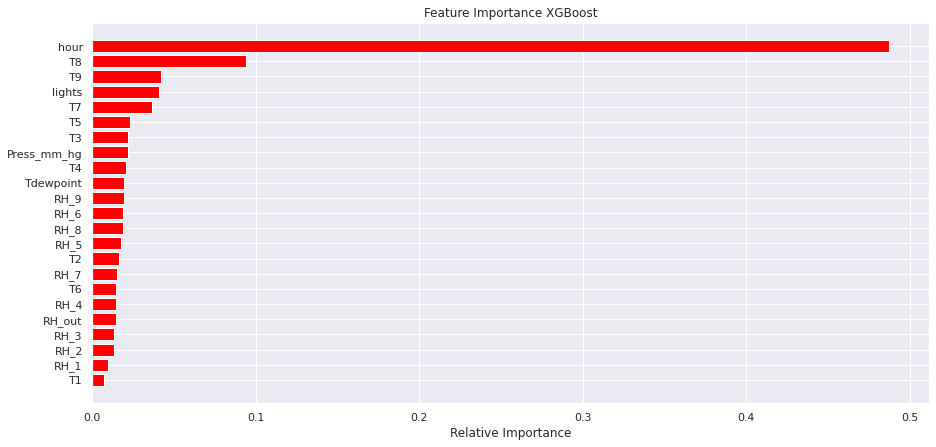

In [ ]:
plt.figure(figsize=(15,7))
feature_importance(X, xgb_optimal_model, 'XGBoost')

Using Stacking Regressor performed slightly better than the XGB Regressor.  However stacking regressors are prone to overfitting.

## Conclusion

* XGBoost performs better compared to other models. We get the least RMSE on test data = 16.85 and the highest R2 score for test data = 0.65. 
* We get best results using Stacking Regressor.
* These predictions can be used by the business to predict the power demand ahead of time and manage their resources better.
* We saw that temperatures and humidity in different rooms are highly correlated. It might be sufficient to measure the temperature and humidity from the most representative rooms
* The data consists of only one house. And we do not know the number of occupants or the kind of appliances in use. This information might give us better insights on energy consumption.
* The data is only for 4.5 months. Different consumption patterns could be found depending on the different seasons in a year.